In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def download_data(ticker, start_date, end_date):
    # Download data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Save data to a CSV file
    filename = ticker + '.csv'
    data.to_csv(filename)

In [3]:
def load_ticker(ticker):
    temp_df = pd.read_csv(f"{ticker}.csv")
    date_column = temp_df['Date']
    returns_column = temp_df['Close'].pct_change()
    return pd.concat([date_column, returns_column], axis=1)

In [4]:
ticker = 'AAPL'
start = '2010-01-01'
end = '2022-01-01'
download_data(ticker, start, end)
df = load_ticker(ticker)
df = df.rename(columns={'Close': 'Returns'})

[*********************100%***********************]  1 of 1 completed


Date   Returns
0     2010-01-04       NaN
1     2010-01-05  0.001729
2     2010-01-06 -0.015906
3     2010-01-07 -0.001849
4     2010-01-08  0.006648
...          ...       ...
3016  2021-12-27  0.022975
3017  2021-12-28 -0.005767
3018  2021-12-29  0.000502
3019  2021-12-30 -0.006578
3020  2021-12-31 -0.003535

In [5]:
df['Tomorrow_Returns'] = df['Returns'].shift(-1)
df.dropna(inplace=True)

In [6]:
X = df[['Returns']]
y = df['Tomorrow_Returns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

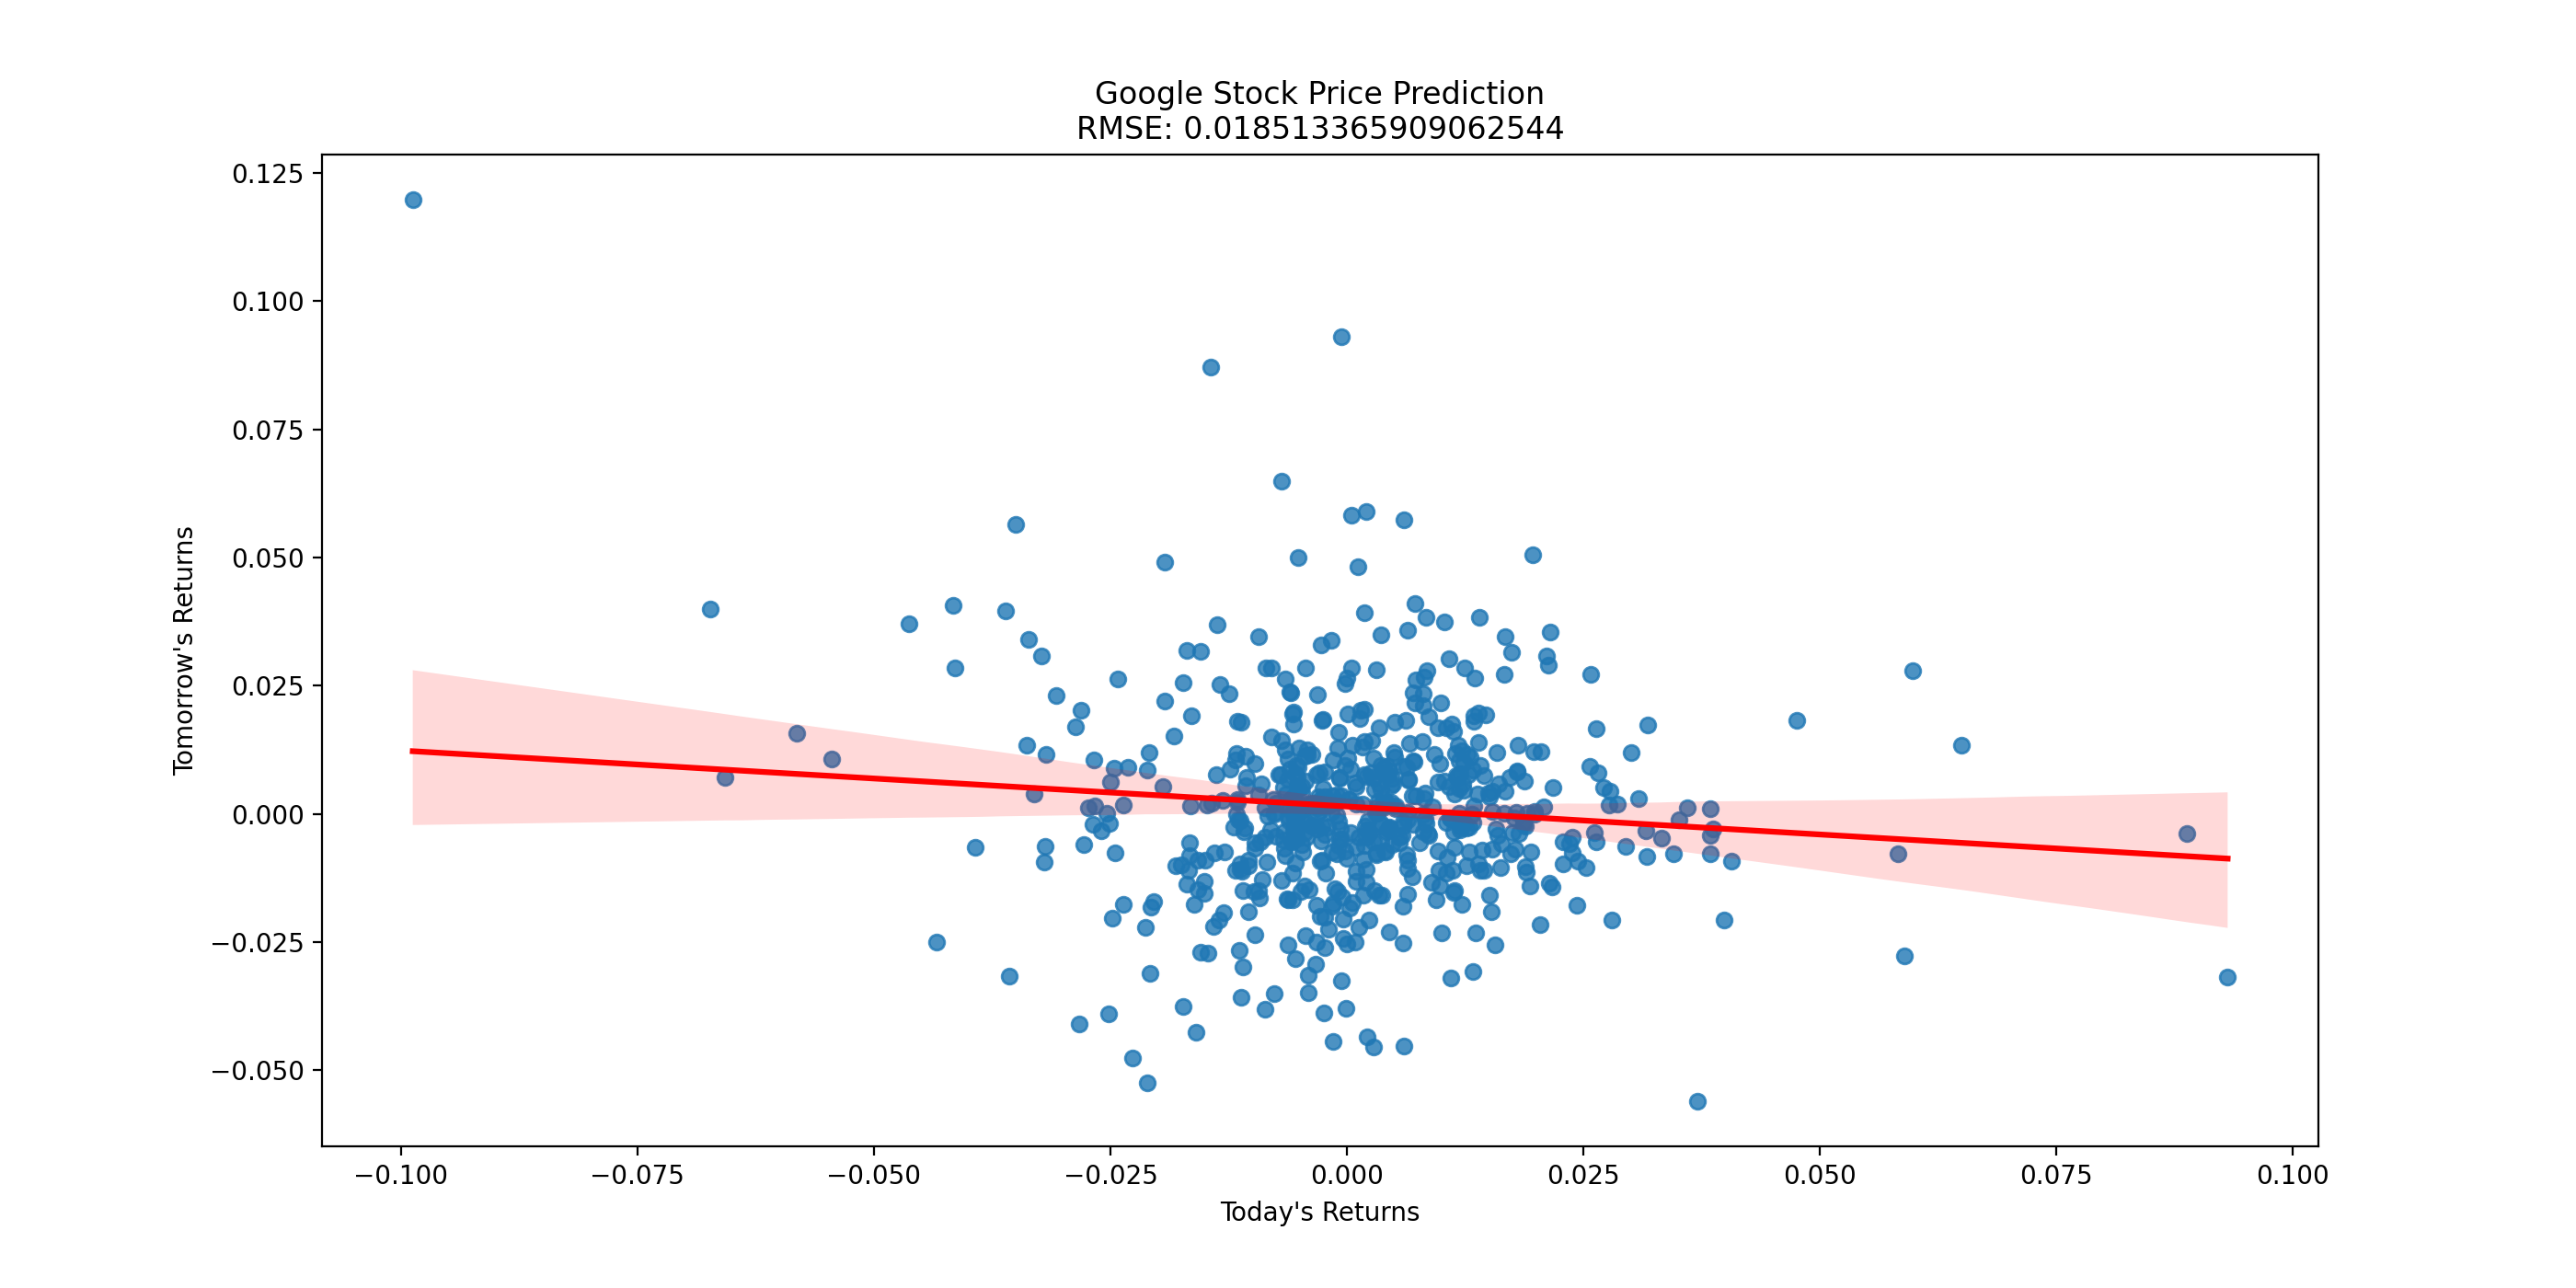